# EDA for NYC Parking Violations Dataset

In [0]:
import pandas as pd
import numpy as np

In [0]:
import findspark
findspark.init()



In [0]:
import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)
df = spark.sql('''select 'spark' as hello ''')
df.show()

+-----+
|hello|
+-----+
|spark|
+-----+



In [0]:
#Read csv and load it as a RDD
sparkdf = spark.read.format("csv").option("header", "true").option("inferSchema","true").load("C:/Users/weiji/OneDrive/Desktop/DSC5102 Capstone Module/Project 2/Dataset/nyc-parking-tickets-2019/nycparkingviolations2019.csv")

In [0]:
#visually inspect the data
sparkdf

Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
1105232165,GLS6001,NY,PAS,07/03/2018,14,SDN,HONDA,X,47130,13230,80030,20180702,78,78,968,86684,0968,0000,0811P,null,K,F,2,HANSON PLACE,null,0,408,D1,null,BBYBBBB,ALL,ALL,BLUE,0,2006,-,0,null,null,null,null,null
1121274900,HXM7361,NY,PAS,06/28/2018,46,SDN,NISSA,X,28990,14890,15040,20200203,112,112,968,103419,0968,0000,1145A,null,Q,F,71-30,AUSTIN ST,null,0,408,C,null,BBBBBBB,ALL,ALL,GRY,0,2017,-,0,null,null,null,null,null
1130964875,GTR7949,NY,PAS,06/08/2018,24,SUBN,JEEP,X,64,18510,99,20180930,122,122,835,0,0835,0000,0355P,null,R,null,null,GREAT KILLS BOAT LAU,null,0,408,D5,null,BBBBBBB,ALL,ALL,GREEN,0,0,-,0,null,null,null,null,null
1130964887,HH1842,NC,PAS,06/07/2018,24,P-U,FORD,X,11310,39800,39735,0,122,122,835,0,0835,0000,0123P,null,R,null,null,GREAT KILLS PARK BOA,null,0,408,D5,null,BBBBBBB,ALL,ALL,WHITE,0,0,-,0,null,null,null,null,null
1131599342,HDG7076,NY,PAS,06/29/2018,17,SUBN,HYUND,X,47130,13230,80030,20190124,78,78,868,2354,0868,0000,0514P,null,K,F,2,HANSON PLACE,null,0,408,C4,null,BBBBBBB,ALL,ALL,GREEN,0,2007,-,0,null,null,null,null,null
1131610520,GER9006,NY,PAS,07/02/2018,17,SUBN,NISSA,X,64790,18640,18790,20190128,103,103,968,86652,0968,0000,0827A,0827A,Q,O,94-14,SUTPHIN BLVD,null,0,408,C,null,BBBBBBB,ALL,ALL,BLK,0,2013,-,0,null,null,null,null,null
1133401569,HLC3177,NY,PAS,07/02/2018,21,SDN,HONDA,S,31830,67030,64830,20181219,77,77,0,559290,KN08,0000,0843A,null,K,F,1235,DEAN STREET,null,0,408,D1,null,YBBYBBB,ALL,ALL,BLACK,0,1999,-,0,null,null,null,null,null
1133401570,HZN6473,NY,PAS,07/02/2018,21,SDN,TOYOT,S,68930,23330,54070,20200429,77,77,0,559290,KN08,0000,0910A,null,K,F,1445,PACIFIC STREET,null,0,408,D1,null,YBBYBBB,ALL,ALL,BLACK,0,2006,-,0,null,null,null,null,null
1133401594,HPC9135,NY,PAS,07/02/2019,21,SUBN,HONDA,S,68930,64830,23330,20190710,77,77,0,559290,KN08,0000,0919A,null,K,F,1369,PACIFIC STREET,null,0,408,D1,null,YBBYBBB,ALL,ALL,GRAY,0,2005,-,0,null,null,null,null,null
1133401636,HZJ8359,NY,PAS,07/02/2018,21,SDN,NISSA,S,67030,19230,80430,20180803,77,77,0,559290,KN08,0000,0818A,null,K,F,666,NOSTRAND AVE,null,0,408,D1,null,YYYYYYB,ALL,ALL,GRAY,0,2018,-,0,null,null,null,null,null


In [0]:
#check the schema of the dataframe
sparkdf.printSchema()


root
 |-- Summons_Number: long (nullable = true)
 |-- Plate_ID: string (nullable = true)
 |-- Registration_State: string (nullable = true)
 |-- Plate_Type: string (nullable = true)
 |-- Issue_Date: string (nullable = true)
 |-- Violation_Code: integer (nullable = true)
 |-- Vehicle_Body_Type: string (nullable = true)
 |-- Vehicle_Make: string (nullable = true)
 |-- Issuing_Agency: string (nullable = true)
 |-- Street_Code1: integer (nullable = true)
 |-- Street_Code2: integer (nullable = true)
 |-- Street_Code3: integer (nullable = true)
 |-- Vehicle_Expiration_Date: integer (nullable = true)
 |-- Violation_Location: integer (nullable = true)
 |-- Violation_Precinct: integer (nullable = true)
 |-- Issuer_Precinct: integer (nullable = true)
 |-- Issuer_Code: integer (nullable = true)
 |-- Issuer_Command: string (nullable = true)
 |-- Issuer_Squad: string (nullable = true)
 |-- Violation_Time: string (nullable = true)
 |-- Time_First_Observed: string (nullable = true)
 |-- Violation_Coun

In [0]:
#remove white space and replace with underscore for columns
sparkdf = sparkdf.toDF(*(c.replace(' ','_') for c in sparkdf.columns))
sparkdf.show(1)

+--------------+--------+------------------+----------+----------+--------------+-----------------+------------+--------------+------------+------------+------------+-----------------------+------------------+------------------+---------------+-----------+--------------+------------+--------------+-------------------+----------------+---------------------------------+------------+------------+-------------------+-------------------+-----------+------------+--------------------+----------------------+--------------------+------------------+-------------+---------------------+------------+------------+--------------+-------------------+---------------------+---------------------------------+-----------------+------------------------+
|Summons_Number|Plate_ID|Registration_State|Plate_Type|Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Issuing_Agency|Street_Code1|Street_Code2|Street_Code3|Vehicle_Expiration_Date|Violation_Location|Violation_Precinct|Issuer_Precinct|Issuer_Code|Is

In [0]:
#check number of columns
len(sparkdf.columns)

43

In [0]:
#check number of rows
sparkdf.count()

11467506

In [0]:
#list the number of null values in each column
import pyspark.sql.functions as F
df_null = sparkdf.agg(*[F.count(F.when(F.isnull(c),c)).alias(c) for c in sparkdf.columns])


In [0]:
#check the number of missing values in each column. Don't have to use topandas as we used spark.conf function
df_null

Summons_Number,Plate_ID,Registration_State,Plate_Type,Issue_Date,Violation_Code,Vehicle_Body_Type,Vehicle_Make,Issuing_Agency,Street_Code1,Street_Code2,Street_Code3,Vehicle_Expiration_Date,Violation_Location,Violation_Precinct,Issuer_Precinct,Issuer_Code,Issuer_Command,Issuer_Squad,Violation_Time,Time_First_Observed,Violation_County,Violation_In_Front_Of_Or_Opposite,House_Number,Street_Name,Intersecting_Street,Date_First_Observed,Law_Section,Sub_Division,Violation_Legal_Code,Days_Parking_In_Effect,From_Hours_In_Effect,To_Hours_In_Effect,Vehicle_Color,Unregistered_Vehicle?,Vehicle_Year,Meter_Number,Feet_From_Curb,Violation_Post_Code,Violation_Description,No_Standing_or_Stopping_Violation,Hydrant_Violation,Double_Parking_Violation
0,0,0,0,0,0,49763,70013,1,0,0,0,0,1877915,0,0,0,1818823,1818901,115,10831060,49076,1906682,2021796,1757,8129069,0,0,1301,9648653,1818870,5786396,5786396,154974,10580471,0,10224866,0,2705830,9648248,11467506,11467506,11467506


In [0]:
#create drop null column function
#create a dictionary to store the key values 
#identify columns with more than 5 million missing rows to drop
import pyspark.sql.functions as F

def drop_null_columns(sparkdf):
    #collect the columns with null values and convert into a dictionary list with key value
    null_counts = sparkdf.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in sparkdf.columns]).collect()[0].asDict()
    #identify each column with more than 5 million rows missing
    to_drop = [k for k, v in null_counts.items() if v > 5000000] #5 million rows condition set here
    #drop the column
    sparkdf = sparkdf.drop(*to_drop)
    return sparkdf

In [0]:
#drop the columns with more than 5 million missing rows
sparkdf2 = drop_null_columns(sparkdf)


In [0]:
#check the schema to see if the columns have been dropped
sparkdf2.printSchema()

root
 |-- Summons_Number: long (nullable = true)
 |-- Plate_ID: string (nullable = true)
 |-- Registration_State: string (nullable = true)
 |-- Plate_Type: string (nullable = true)
 |-- Issue_Date: string (nullable = true)
 |-- Violation_Code: integer (nullable = true)
 |-- Vehicle_Body_Type: string (nullable = true)
 |-- Vehicle_Make: string (nullable = true)
 |-- Issuing_Agency: string (nullable = true)
 |-- Street_Code1: integer (nullable = true)
 |-- Street_Code2: integer (nullable = true)
 |-- Street_Code3: integer (nullable = true)
 |-- Vehicle_Expiration_Date: integer (nullable = true)
 |-- Violation_Location: integer (nullable = true)
 |-- Violation_Precinct: integer (nullable = true)
 |-- Issuer_Precinct: integer (nullable = true)
 |-- Issuer_Code: integer (nullable = true)
 |-- Issuer_Command: string (nullable = true)
 |-- Issuer_Squad: string (nullable = true)
 |-- Violation_Time: string (nullable = true)
 |-- Violation_County: string (nullable = true)
 |-- Violation_In_Fron

In [0]:
#The issue date is still in string format, need to cast it to timestamp format
from pyspark.sql.functions import date_format
from pyspark.sql.functions import unix_timestamp, from_unixtime
from pyspark.sql.functions import to_date

sparkdf3 = sparkdf2.withColumn("Issue_Date", to_date('Issue_Date', "MM/dd/yyyy").cast("timestamp"))

In [0]:
#check that the issue date column has been converted
sparkdf3.printSchema()

root
 |-- Summons_Number: long (nullable = true)
 |-- Plate_ID: string (nullable = true)
 |-- Registration_State: string (nullable = true)
 |-- Plate_Type: string (nullable = true)
 |-- Issue_Date: timestamp (nullable = true)
 |-- Violation_Code: integer (nullable = true)
 |-- Vehicle_Body_Type: string (nullable = true)
 |-- Vehicle_Make: string (nullable = true)
 |-- Issuing_Agency: string (nullable = true)
 |-- Street_Code1: integer (nullable = true)
 |-- Street_Code2: integer (nullable = true)
 |-- Street_Code3: integer (nullable = true)
 |-- Vehicle_Expiration_Date: integer (nullable = true)
 |-- Violation_Location: integer (nullable = true)
 |-- Violation_Precinct: integer (nullable = true)
 |-- Issuer_Precinct: integer (nullable = true)
 |-- Issuer_Code: integer (nullable = true)
 |-- Issuer_Command: string (nullable = true)
 |-- Issuer_Squad: string (nullable = true)
 |-- Violation_Time: string (nullable = true)
 |-- Violation_County: string (nullable = true)
 |-- Violation_In_F

In [0]:
#clean the Violation_Time column to ensure hours are correct
from pyspark.sql.functions import col, when, substring
#clean the violation_time column and get the hour of the violation time
hour_list = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
sparkdf3 = sparkdf3.withColumn('ValidTime', when(substring(col('Violation_Time'),1,2).isin(hour_list),'True').otherwise('False'))

In [0]:
#create new column Violation_Period to store the hour
sparkdf3= sparkdf3.where(sparkdf3.ValidTime =='True').drop('ValidTime')
sparkdf3 = sparkdf3.withColumn('Violation_Period',when((substring(col('Violation_Time'),-1,1) == 'P') & (substring(col('Violation_Time'),1,2).cast('int') <= 11),
            (substring(col('Violation_Time'),1,2).cast('int') + 12).cast('string'))
            .otherwise(substring(col('Violation_Time'),1,2)))

In [0]:
#check if Violation_Period is in df
sparkdf3.printSchema()

root
 |-- Summons_Number: long (nullable = true)
 |-- Plate_ID: string (nullable = true)
 |-- Registration_State: string (nullable = true)
 |-- Plate_Type: string (nullable = true)
 |-- Issue_Date: timestamp (nullable = true)
 |-- Violation_Code: integer (nullable = true)
 |-- Vehicle_Body_Type: string (nullable = true)
 |-- Vehicle_Make: string (nullable = true)
 |-- Issuing_Agency: string (nullable = true)
 |-- Street_Code1: integer (nullable = true)
 |-- Street_Code2: integer (nullable = true)
 |-- Street_Code3: integer (nullable = true)
 |-- Vehicle_Expiration_Date: integer (nullable = true)
 |-- Violation_Location: integer (nullable = true)
 |-- Violation_Precinct: integer (nullable = true)
 |-- Issuer_Precinct: integer (nullable = true)
 |-- Issuer_Code: integer (nullable = true)
 |-- Issuer_Command: string (nullable = true)
 |-- Issuer_Squad: string (nullable = true)
 |-- Violation_Time: string (nullable = true)
 |-- Violation_County: string (nullable = true)
 |-- Violation_In_F

In [0]:
# To SQL, you need to create a temporary view, test it with the whole dataframe

sparkdf3.createOrReplaceTempView("nycparkingtable")
spark.sql('Select * from nycparkingtable')

Summons_Number,Plate_ID,Registration_State,Plate_Type,Issue_Date,Violation_Code,Vehicle_Body_Type,Vehicle_Make,Issuing_Agency,Street_Code1,Street_Code2,Street_Code3,Vehicle_Expiration_Date,Violation_Location,Violation_Precinct,Issuer_Precinct,Issuer_Code,Issuer_Command,Issuer_Squad,Violation_Time,Violation_County,Violation_In_Front_Of_Or_Opposite,House_Number,Street_Name,Date_First_Observed,Law_Section,Sub_Division,Days_Parking_In_Effect,Vehicle_Color,Vehicle_Year,Feet_From_Curb,Violation_Post_Code,Violation_Period
1105232165,GLS6001,NY,PAS,2018-07-03 00:00:00,14,SDN,HONDA,X,47130,13230,80030,20180702,78,78,968,86684,0968,0000,0811P,K,F,2,HANSON PLACE,0,408,D1,BBYBBBB,BLUE,2006,0,null,20
1121274900,HXM7361,NY,PAS,2018-06-28 00:00:00,46,SDN,NISSA,X,28990,14890,15040,20200203,112,112,968,103419,0968,0000,1145A,Q,F,71-30,AUSTIN ST,0,408,C,BBBBBBB,GRY,2017,0,null,11
1130964875,GTR7949,NY,PAS,2018-06-08 00:00:00,24,SUBN,JEEP,X,64,18510,99,20180930,122,122,835,0,0835,0000,0355P,R,null,null,GREAT KILLS BOAT LAU,0,408,D5,BBBBBBB,GREEN,0,0,null,15
1130964887,HH1842,NC,PAS,2018-06-07 00:00:00,24,P-U,FORD,X,11310,39800,39735,0,122,122,835,0,0835,0000,0123P,R,null,null,GREAT KILLS PARK BOA,0,408,D5,BBBBBBB,WHITE,0,0,null,13
1131599342,HDG7076,NY,PAS,2018-06-29 00:00:00,17,SUBN,HYUND,X,47130,13230,80030,20190124,78,78,868,2354,0868,0000,0514P,K,F,2,HANSON PLACE,0,408,C4,BBBBBBB,GREEN,2007,0,null,17
1131610520,GER9006,NY,PAS,2018-07-02 00:00:00,17,SUBN,NISSA,X,64790,18640,18790,20190128,103,103,968,86652,0968,0000,0827A,Q,O,94-14,SUTPHIN BLVD,0,408,C,BBBBBBB,BLK,2013,0,null,08
1133401569,HLC3177,NY,PAS,2018-07-02 00:00:00,21,SDN,HONDA,S,31830,67030,64830,20181219,77,77,0,559290,KN08,0000,0843A,K,F,1235,DEAN STREET,0,408,D1,YBBYBBB,BLACK,1999,0,null,08
1133401570,HZN6473,NY,PAS,2018-07-02 00:00:00,21,SDN,TOYOT,S,68930,23330,54070,20200429,77,77,0,559290,KN08,0000,0910A,K,F,1445,PACIFIC STREET,0,408,D1,YBBYBBB,BLACK,2006,0,null,09
1133401594,HPC9135,NY,PAS,2019-07-02 00:00:00,21,SUBN,HONDA,S,68930,64830,23330,20190710,77,77,0,559290,KN08,0000,0919A,K,F,1369,PACIFIC STREET,0,408,D1,YBBYBBB,GRAY,2005,0,null,09
1133401636,HZJ8359,NY,PAS,2018-07-02 00:00:00,21,SDN,NISSA,S,67030,19230,80430,20180803,77,77,0,559290,KN08,0000,0818A,K,F,666,NOSTRAND AVE,0,408,D1,YYYYYYB,GRAY,2018,0,null,08


In [0]:
# check total number of tickets for each year
# there are erroneous entries after 2019
sql_ticket_year = spark.sql("select year(Issue_Date) as year, count(Summons_Number) as no_of_tickets from nycparkingtable group by year order by year")
sql_ticket_year.show(100)

+----+-------------+
|year|no_of_tickets|
+----+-------------+
|1974|            1|
|1981|            1|
|1986|            1|
|1988|            1|
|1991|            2|
|1992|            1|
|1996|            1|
|2000|          103|
|2002|            1|
|2004|            3|
|2007|            3|
|2008|            8|
|2009|           15|
|2010|           63|
|2011|           27|
|2012|           27|
|2013|           26|
|2014|           42|
|2015|           49|
|2016|          115|
|2017|          384|
|2018|      6115349|
|2019|      5350819|
|2020|          239|
|2021|           15|
|2022|            5|
|2024|            1|
|2025|            2|
|2026|            3|
|2028|           11|
|2029|            8|
|2030|            9|
|2031|            3|
|2034|            1|
|2043|            1|
|2045|            1|
|2048|            2|
|2050|            1|
|2060|            1|
|2068|            1|
|2069|            1|
+----+-------------+



In [0]:
# Filtering only 2018 and 2019 data
sparkdf3.createOrReplaceTempView("table_view")
dataforyears = spark.sql("select * from table_view where year(to_date(cast(unix_timestamp(Issue_Date,'MM/dd/yyyy') as timestamp))) in (2018, 2019)")
dataforyears.count()



11466168

In [0]:
#Create another temp table that contains the data from 2018 and 2019
dataforyears.createOrReplaceTempView("table_view2")

#Check the distribution of violations by each month for 2018 and 2019
Distribution_by_months= spark.sql("SELECT year(Issue_Date) as year,month(Issue_Date) as month,count(*) as Ticket_Frequency FROM table_view2 GROUP BY year(Issue_Date),month(Issue_Date) order by Ticket_Frequency desc")
Distribution_by_months.show()

+----+-----+----------------+
|year|month|Ticket_Frequency|
+----+-----+----------------+
|2018|   10|         1156809|
|2019|    1|         1042103|
|2018|   11|         1007790|
|2019|    3|          969632|
|2018|    7|          965553|
|2019|    5|          960250|
|2018|    8|          942913|
|2018|   12|          932970|
|2018|    9|          902917|
|2019|    4|          896769|
|2019|    2|          850207|
|2019|    6|          630452|
|2018|    6|          202266|
|2018|    5|            2565|
|2018|    1|             787|
|2019|    7|             306|
|2019|   12|             280|
|2018|    3|             278|
|2018|    4|             263|
|2018|    2|             238|
+----+-----+----------------+
only showing top 20 rows



<Figure size 432x288 with 0 Axes>

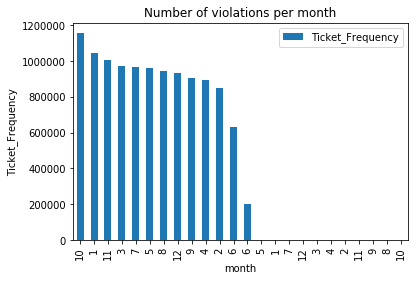

In [0]:
#plot the distribution by month
import pandas as pd
import matplotlib.pyplot as plt
No_violations_per_month = Distribution_by_months.toPandas()

plt.clf()
No_violations_per_month.plot(x= 'month', y='Ticket_Frequency', kind='bar')
plt.title("Number of violations per month")
plt.xlabel('month')
plt.ylabel('Ticket_Frequency')
plt.show()

In [0]:
#Find out which are the types of violations that are the most common

violationtype = spark.sql("SELECT Violation_Code, Count(*) as Ticket_Frequency from table_view2 group by Violation_code order by Ticket_Frequency desc")
violationtype.show(5)

+--------------+----------------+
|Violation_Code|Ticket_Frequency|
+--------------+----------------+
|            21|         1803163|
|            38|         1165878|
|            36|         1098298|
|            14|         1013435|
|            20|          795674|
+--------------+----------------+
only showing top 5 rows



<Figure size 432x288 with 0 Axes>

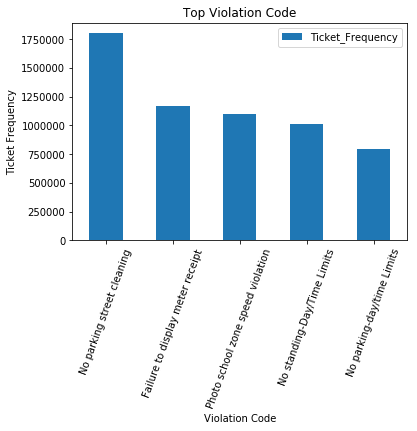

In [0]:
# Plot the Top 5 Violation code
topviolations = violationtype.toPandas()
plt.clf()
topviolations.head(5).plot(x='Violation_Code', y='Ticket_Frequency', kind='bar')
plt.title("Top Violation Code")
plt.xlabel('Violation Code')

plt.ylabel('Ticket Frequency')
plt.xticks(np.arange(5), ('No parking street cleaning', 'Failure to display meter receipt', 'Photo school zone speed violation', 'No standing-Day/Time Limits', 'No parking-day/time Limits'))
plt.xticks(rotation=70)
plt.show()

In [0]:
#Find out which carplates have the highest number of violations.

carplate_check=spark.sql("Select Plate_ID, count(*) as Ticket_Frequency from table_view2 group by Plate_ID having count(*)>1 order by Ticket_Frequency desc")
carplate_check.show()

+----------+----------------+
|  Plate_ID|Ticket_Frequency|
+----------+----------------+
|BLANKPLATE|            8291|
|   2028685|            1281|
|        NS|            1264|
|   2703427|            1183|
|   2705138|            1178|
|   34914PC|            1143|
|   47832MD|            1102|
|   23189TC|            1092|
|    AT461E|            1070|
|   2731061|            1051|
|    AT462E|            1040|
|   2703208|            1019|
|   12863KA|             989|
|   11104ML|             983|
|   14828MJ|             980|
|   12125MJ|             972|
|   12821KA|             965|
|   59744PC|             928|
|   80635JW|             920|
|   14881MJ|             909|
+----------+----------------+
only showing top 20 rows



In [0]:
#We can remove rows with blankplates from the years dataframe
dataforyears=dataforyears[dataforyears.Plate_ID!='BLANKPLATE']
dataforyears.count()

11457877

In [0]:
# Lets see number of violations above 400
# create another temp table using the data2018 table where blankplates have been removed
dataforyears.createOrReplaceTempView("table_view3")

carplate_400=spark.sql("Select Plate_ID, count(*) as Ticket_Frequency from table_view3 group by Plate_ID having count(*)>=400 order by Ticket_Frequency desc")
carplate_400.show()

+--------+----------------+
|Plate_ID|Ticket_Frequency|
+--------+----------------+
| 2028685|            1281|
|      NS|            1264|
| 2703427|            1183|
| 2705138|            1178|
| 34914PC|            1143|
| 47832MD|            1102|
| 23189TC|            1092|
|  AT461E|            1070|
| 2731061|            1051|
|  AT462E|            1040|
| 2703208|            1019|
| 12863KA|             989|
| 11104ML|             983|
| 14828MJ|             980|
| 12125MJ|             972|
| 12821KA|             965|
| 59744PC|             928|
| 80635JW|             920|
| 14881MJ|             909|
| 56253MG|             894|
+--------+----------------+
only showing top 20 rows



<Figure size 432x288 with 0 Axes>

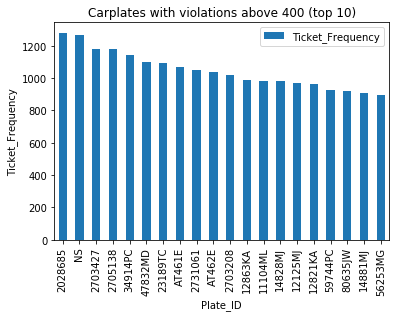

In [0]:
# Plot top 20 carplates with violations above 400
no_violations_by_carplate = carplate_400.toPandas()
plt.clf()
no_violations_by_carplate.head(20).plot(x= 'Plate_ID', y='Ticket_Frequency', kind='bar')
plt.title("Carplates with violations above 400 (top 10)")
plt.xlabel('Plate_ID')
plt.ylabel('Ticket_Frequency')
plt.show()



In [0]:
#Find out why plate_ID = 2028685 incurred so many violations
#get subset of dataframe with selected columns of interest
indivplate = sparkdf3.where(sparkdf3.Plate_ID == "2028685").select("Plate_Type", "Violation_Code","Violation_Location","Issuer_Code")


In [0]:
indivplate.show()

+----------+--------------+------------------+-----------+
|Plate_Type|Violation_Code|Violation_Location|Issuer_Code|
+----------+--------------+------------------+-----------+
|       PAS|            84|                18|     937823|
|       PAS|            46|                18|     949733|
|       PAS|             9|                18|     949733|
|       PAS|            17|                13|     949733|
|       PAS|            84|                18|     954394|
|       PAS|            14|              null|     950332|
|       PAS|            84|              null|     959745|
|       PAS|            14|              null|     959745|
|       PAS|            14|              null|     959006|
|       PAS|            14|               401|     945615|
|       PAS|            84|               401|     945615|
|       PAS|            46|                18|     353103|
|       PAS|            84|                18|     353103|
|       PAS|            84|                18|     36314

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

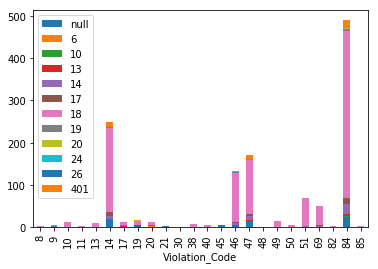

In [0]:
#For individual plate 2028685, plot violation code by violation location
#seems like for plate 2028685, most of the violations were "No standing Bus Lane" and frequently occurign in
#precint 81 which covers downtown Brooklyn

indivplateanalysis = indivplate.groupBy("Violation_Code").pivot("Violation_location").count().toPandas()
indivplateanalysis = indivplateanalysis.set_index("Violation_Code").sort_index()
indivplateanalysis.plot(kind='bar',stacked=True)
plt.figure(figsize=(100,200))
plt.legend(loc=1,prop={'size': 8})
plt.show



In [0]:
#find out which were the states (the cars were registered to) that have incurred the most number of violations
#could it be tourists

state_of_origin = spark.sql("SELECT distinct(Registration_State), Count(*) as Ticket_Frequency from table_view2 group by Registration_State order by Ticket_Frequency desc")
state_of_origin.count()

68

In [0]:
state_of_origin.show()

+------------------+----------------+
|Registration_State|Ticket_Frequency|
+------------------+----------------+
|                NY|         8918726|
|                NJ|         1003618|
|                PA|          294939|
|                CT|          152021|
|                IN|          147087|
|                FL|          145140|
|                MA|           81120|
|                VA|           71871|
|                MD|           58835|
|                NC|           54548|
|                TX|           52086|
|                IL|           39564|
|                GA|           35898|
|                ME|           33092|
|                AZ|           27148|
|                99|           26887|
|                GV|           25811|
|                MN|           25757|
|                OH|           25482|
|                CA|           23216|
+------------------+----------------+
only showing top 20 rows



<Figure size 7200x14400 with 0 Axes>

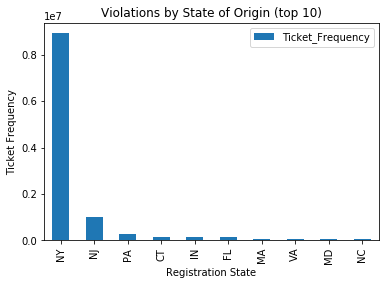

In [0]:
# plot violation based on the states the cars were registered to
originstate = state_of_origin.toPandas()
plt.figure(figsize=(100,200))
originstate.head(10).plot(x='Registration_State', y='Ticket_Frequency', kind='bar')
plt.title("Violations by State of Origin (top 10)")
plt.xlabel('Registration State')
plt.ylabel('Ticket Frequency')

plt.show()

In [0]:
#Find out which precints had most violations and which violation codes 
#get subset of dataframe with selected columns of interest
Precint = spark.sql("SELECT Violation_Location, Violation_Code, Count(*) as Ticket_Frequency from table_view2 group by Violation_Location, Violation_Code order by Ticket_Frequency desc")
Precint.show()

+------------------+--------------+----------------+
|Violation_Location|Violation_Code|Ticket_Frequency|
+------------------+--------------+----------------+
|              null|            36|         1098296|
|              null|             7|          471754|
|              null|             5|          248774|
|                18|            14|          132123|
|               114|            21|           84051|
|                14|            14|           83664|
|                19|            46|           82640|
|                14|            69|           69006|
|                 1|            14|           68012|
|                19|            38|           66860|
|               114|            38|           61207|
|                19|            21|           61127|
|                 1|            20|           58816|
|                 6|            20|           55970|
|                70|            21|           53263|
|                13|            69|           

<Figure size 7200x14400 with 0 Axes>

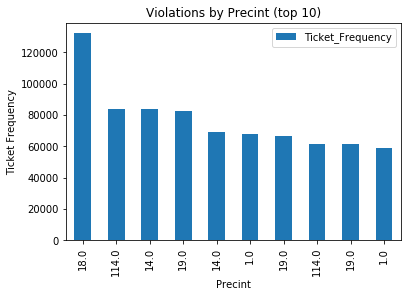

In [0]:
# plot ticket frequencies based on the precint. Use precint website to see where are the precints, can postulate if it's due to tourist attractions

precintplot = Precint.toPandas()
plt.figure(figsize=(100,200))

#remove missing rows from Violation_Location first
precintplotnomiss = precintplot.dropna(subset=['Violation_Location'])
precintplotnomiss.head(10).plot(x='Violation_Location', y='Ticket_Frequency', kind='bar')
plt.title("Violations by Precint (top 10)")
plt.xlabel('Precint')
plt.ylabel('Ticket Frequency')

plt.show()

In [0]:
#find out which car brands incur the most violations
carbrands = spark.sql("SELECT Vehicle_Make, count(*) as Ticket_Frequency from table_view2 group by Vehicle_Make order by Ticket_Frequency desc")
carbrands.show(10)

+------------+----------------+
|Vehicle_Make|Ticket_Frequency|
+------------+----------------+
|        FORD|         1361531|
|       TOYOT|         1258443|
|       HONDA|         1147883|
|       NISSA|          967211|
|       CHEVR|          713622|
|       FRUEH|          580806|
|       ME/BE|          443853|
|       DODGE|          406472|
|         BMW|          385823|
|        JEEP|          382440|
+------------+----------------+
only showing top 10 rows



<Figure size 432x288 with 0 Axes>

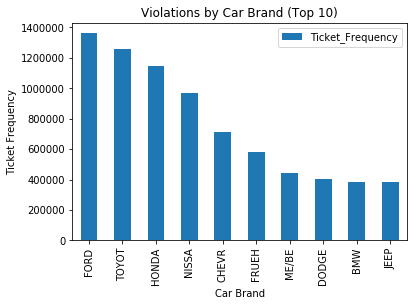

In [0]:
# plot Violations on the basis of Vehicle_Make
carbrandsviolations = carbrands.toPandas()
plt.clf()
carbrandsviolations.head(10).plot(x='Vehicle_Make', y='Ticket_Frequency', kind='bar')
plt.title("Violations by Car Brand (Top 10)")
plt.xlabel('Car Brand')
plt.ylabel('Ticket Frequency')
plt.show()

In [0]:
#Convert "Violation_Time" column to a timestamp and create a new column "Violation_Timestamp" to store the data
#use getItem command to split on space and get first item
sparkdf4 = sparkdf3.withColumn('Violation_Timestamp', F.split(F.to_timestamp('Violation_Time', 'HHmm'),' ').getItem(1))


In [0]:
#create new temp table and select only hour in violation_timestamp column and the ticket frequency
sparkdf4.createOrReplaceTempView("table_view3")
violationbytime = spark.sql("SELECT hour(Violation_Timestamp) as hour,count(*) as Ticket_Frequency FROM table_view3 GROUP BY hour(Violation_Timestamp)order by Ticket_Frequency desc")
violationbytime.show()

+----+----------------+
|hour|Ticket_Frequency|
+----+----------------+
|   9|         1332492|
|  11|         1307552|
|   1|         1258818|
|   8|         1230126|
|  12|         1101576|
|  10|         1091237|
|   2|         1075142|
|   3|          769153|
|   7|          691008|
|   4|          588028|
|   5|          491329|
|   6|          474581|
|   0|           56197|
|  14|              17|
|  13|              13|
|  21|              12|
|  16|              11|
|  19|              10|
|  17|               9|
|  15|               8|
+----+----------------+
only showing top 20 rows



<Figure size 432x288 with 0 Axes>

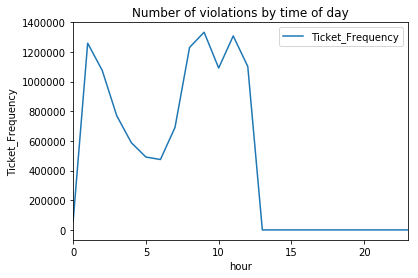

In [0]:
#plot the number of violations by time of day
No_violations_by_time = violationbytime.toPandas()
plt.clf()
#Remove missing rows for "hours" column
No_violations_by_timenomiss = No_violations_by_time.dropna(subset=['hour'])
No_violations_by_timenomiss = No_violations_by_timenomiss.sort_values(['hour'])
No_violations_by_timenomiss.plot(x= 'hour', y='Ticket_Frequency', kind='line')
plt.title("Number of violations by time of day")
plt.xlabel('hour')
plt.ylabel('Ticket_Frequency')
plt.show()


In [0]:
#We can remove rows with 0 from the issuercode dataframe
sparkdf5=sparkdf4[sparkdf4.Issuer_Code!='0']
sparkdf5.createOrReplaceTempView("table_view4")

In [0]:
#find frequency of tickets by issuer and violation code - to see which warden issued the most tickets and by which codes
issuer_code_freq = spark.sql("select Issuer_Code,Violation_Code, count(*) as Ticket_Frequency from table_view4 group by Issuer_Code, Violation_Code order by Ticket_Frequency desc" )
issuer_code_freq.show(20)

+-----------+--------------+----------------+
|Issuer_Code|Violation_Code|Ticket_Frequency|
+-----------+--------------+----------------+
|     346199|            21|            9198|
|     347607|            21|            7581|
|     361883|            21|            6861|
|     357358|            21|            6834|
|     357093|            21|            6528|
|     341921|            21|            6226|
|     350428|            21|            6006|
|     347663|            21|            5917|
|     355542|            21|            5868|
|     903530|            21|            5862|
|     362209|            21|            5596|
|     347615|            21|            5568|
|     362237|            21|            5564|
|     361904|            21|            5384|
|     357052|            21|            5295|
|     366488|            21|            5265|
|     358632|            21|            5209|
|     352956|            21|            5198|
|     351343|            21|      

<Figure size 432x288 with 0 Axes>

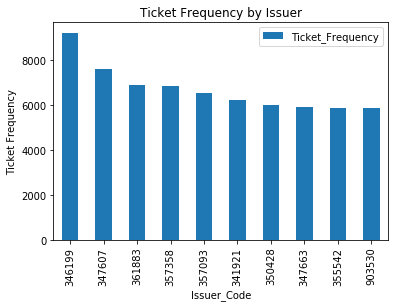

In [0]:
import matplotlib.pyplot as plt
#plot the issuer code by ticket code
issuercodefreq = issuer_code_freq.toPandas()

plt.clf()
issuercodefreq.head(10).plot(x= 'Issuer_Code', y='Ticket_Frequency', kind='bar')
plt.title("Ticket Frequency by Issuer")
plt.xlabel('Issuer_Code')
plt.ylabel('Ticket Frequency')
plt.show()


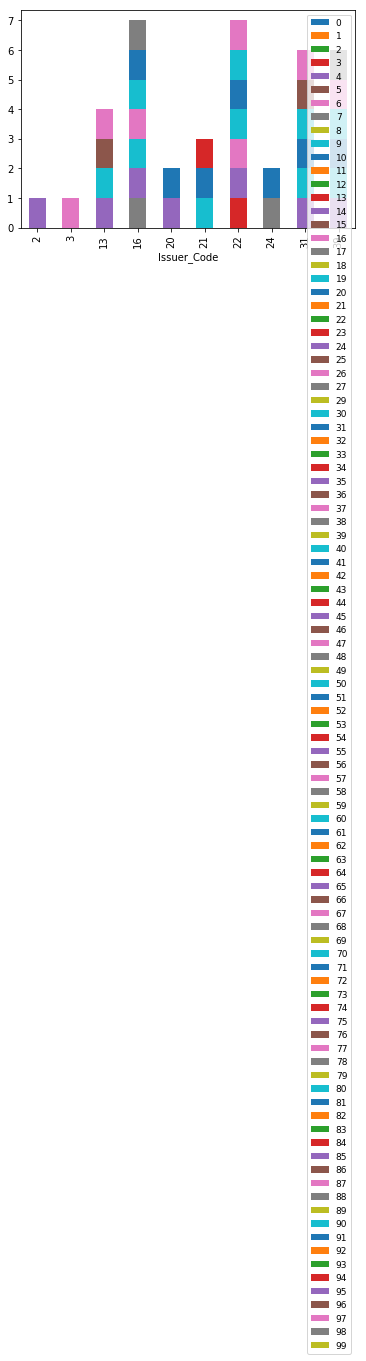

In [0]:
#ignore this for now
#Code to get issuer code by violation code but too large
issuerviolation = issuer_code_freq.groupBy('Issuer_Code').pivot('Violation_Code').count().toPandas()
issuerviolation = issuerviolation.set_index('Issuer_Code').sort_index()
issuerviolation.head(10).plot(kind='bar',stacked=True)
plt.legend(loc=1,prop={'size': 9})